In [224]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver   
import matplotlib.pyplot as plt
import seaborn as sns

# Multipage

In [216]:
data = []
row_headers=["Product Name","Price","MRP","Money Saved","Discount","Category","Sub Category","Supplier"]
item_data_frame=pd.DataFrame(data,columns=row_headers)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
main_url = 'https://www.jiomart.com/'
# executable_path param is not needed if you updated PATH
browser = webdriver.Chrome(options=options, executable_path='D:/Sunny/web scraping/chromedriver.exe')
browser.get(main_url)
html = browser.page_source

main_content = BeautifulSoup(html,'html.parser')
main_content = BeautifulSoup(main_content.prettify(),'html.parser')

print(main_content)
browser.quit()

C:\Users\sesa525768\AppData\Local\Temp\ipykernel_15896\1725465354.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(options=options, executable_path='D:/Sunny/web scraping/chromedriver.exe')


<html lang="en-US">
<head>
<title>
   Buy Grocery Online | Daily Needs Supermarket - JioMart
  </title>
<meta charset="utf-8"/>
<meta content="INDEX,FOLLOW" name="robots"/>
<meta content="Jiomart - Choose and Buy Online Grocery from a wide range of fruits, vegetables, baby care products, personal care products and much more. Shop Now !" name="description"/>
<meta content="Online Grocery, Fruits &amp; Vegetables, Staples, Dairy, Packages Foods, Home care, Personal Care" name="keywords"/>
<meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="JioMart" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="Buy Grocery Online | Daily Needs Supermarket - JioMart" property="og:title"/>
<meta content="Jiomart - Choose and Buy Online Grocery from a wide range of fruits, vegetables, baby care products, personal care products and much more. Shop Now !" property="og:description

In [217]:
urls=[]
main_menu_items = main_content.find_all('li',{'class':'o-menu'})

for main_menu in main_menu_items:
    sub_main_menu_items = main_menu.find_all('li')
    for sub_main_menu in sub_main_menu_items:
        link_extension=sub_main_menu.find('a')['href']
        urls.append(main_url+link_extension)
print(urls)


['https://www.jiomart.com//c/groceries/fruits-vegetables/219', 'https://www.jiomart.com//c/groceries/dairy-bakery/61', 'https://www.jiomart.com//c/groceries/staples/13', 'https://www.jiomart.com//c/groceries/snacks-branded-foods/10', 'https://www.jiomart.com//c/groceries/beverages/33', 'https://www.jiomart.com//c/groceries/personal-care/91', 'https://www.jiomart.com//c/groceries/home-care/36', 'https://www.jiomart.com//c/groceries/home-kitchen/1687', 'https://www.jiomart.com//c/groceries/mom-baby-care/2551', 'https://www.jiomart.com//c/groceries/pets/3346', 'https://www.jiomart.com//c/premiumfruits/apples-pears/7470', 'https://www.jiomart.com//c/premiumfruits/avocado-peach-plum/7473', 'https://www.jiomart.com//c/premiumfruits/banana-melons-coconut/7479', 'https://www.jiomart.com//c/premiumfruits/cherries-berries-exotic-fruits/7483', 'https://www.jiomart.com//c/premiumfruits/citrus-mango-grapes/7489', 'https://www.jiomart.com//c/premiumfruits/dates/7493', 'https://www.jiomart.com//c/pre

In [218]:
data = []
count=0

pages=100

url_input=""
for j in urls:
    url_input=j
    print(url_input)
    for i in range(1,pages+1):
        url=url_input + '/page/' + str(i)
        page = requests.get(url)
        content = BeautifulSoup(page.content,'html.parser')
        content = BeautifulSoup(content.prettify(),'html.parser')
        items = content.find_all('div',{'class':'col-md-3 p-0'})


        for item in items:
            
            #check if page exists
        
            check_page = item.find('div',{'class':'empty_listing'})

            if check_page != None:
                break

            #product Title

            title=item.find('span',{'class':'clsgetname'})
            title = title.text.strip()

            #product price

            price = item.find('span',{'id':'final_price'})
            price = price.text.strip()[2:]
            price = float(price.replace(',', ''))

            # discount

            discount_div = item.find('span',{'class':'dis_section'})

            if discount_div != None:
                discount = discount_div.find('span')
                discount = discount.text
                discount = discount.replace('%', '')
                discount = int(discount.strip())

            else:
                discount = 0

            #mrp

            mrp = item.find('strike',{'id':'price'})

            if mrp != None:
                mrp = mrp.text.strip()[2:]
                mrp = float(mrp.replace(',', ''))

            else:
                mrp = price


            #money saved

            money_saved = mrp - price


            #supplier
            supplier = item.find('span',{'class':'drug-varients ellipsis'})
            supplier = supplier.text.strip()

            #sub-category
        
            sub_category = content.find('title')
            sub_category = sub_category.text.strip()
            index = sub_category.find('-')
            sub_category = sub_category[:index-1]

            #category
            if item.find('div',{'class':'cart_btn'}) != None:
                category = item.find('div',{'class':'cart_btn'})['data-vertical']
            else:
                category = sub_category



            #putting the data in a list to push it to a data frame
            data_element=[title,price,mrp,money_saved,discount,category,sub_category,supplier]
            data.append(data_element)

    temp_df=pd.DataFrame(data,columns=row_headers)
    item_data_frame = pd.concat([item_data_frame,temp_df],ignore_index=True)
    temp_df




        

https://www.jiomart.com//c/groceries/fruits-vegetables/219
https://www.jiomart.com//c/groceries/dairy-bakery/61
https://www.jiomart.com//c/groceries/staples/13
https://www.jiomart.com//c/groceries/snacks-branded-foods/10
https://www.jiomart.com//c/groceries/beverages/33
https://www.jiomart.com//c/groceries/personal-care/91
https://www.jiomart.com//c/groceries/home-care/36
https://www.jiomart.com//c/groceries/home-kitchen/1687
https://www.jiomart.com//c/groceries/mom-baby-care/2551
https://www.jiomart.com//c/groceries/pets/3346
https://www.jiomart.com//c/premiumfruits/apples-pears/7470
https://www.jiomart.com//c/premiumfruits/avocado-peach-plum/7473
https://www.jiomart.com//c/premiumfruits/banana-melons-coconut/7479
https://www.jiomart.com//c/premiumfruits/cherries-berries-exotic-fruits/7483
https://www.jiomart.com//c/premiumfruits/citrus-mango-grapes/7489
https://www.jiomart.com//c/premiumfruits/dates/7493
https://www.jiomart.com//c/premiumfruits/gift-assorted-xl-packs/7496
https://www

# Single Page Extraction


In [211]:
url_input = input('Enter the website url: ')
pages= int(input('Enter the number of pages to scrap'))

Enter the website url: https://www.jiomart.com/c/jewellery/fine-jewellery/1531
Enter the number of pages to scrap5


In [212]:
data = []
count=0

item_data_frame=pd.DataFrame(data,columns=row_headers)



for i in range(1,pages+1):
    url=url_input + '/page/' + str(i)
    page = requests.get(url)
    content = BeautifulSoup(page.content,'html.parser')
    content = BeautifulSoup(content.prettify(),'html.parser')
    items = content.find_all('div',{'class':'col-md-3 p-0'})
    

    for item in items:
        
        #check if page exists
        
        check_page = item.find('div',{'class':'empty_listing'})
        
        if check_page != None:
            break
        
        #product Title
        
        title=item.find('span',{'class':'clsgetname'})
        title = title.text.strip()
        
        #product price
        
        price = item.find('span',{'id':'final_price'})
        price = price.text.strip()[2:]
        price = float(price.replace(',', ''))

        # discount
        
        discount_div = item.find('span',{'class':'dis_section'})
        
        if discount_div != None:
            discount = discount_div.find('span')
            discount = discount.text
            discount = discount.replace('%', '')
            discount = int(discount.strip())
        
        else:
            discount = 0
        
        #mrp
        
        mrp = item.find('strike',{'id':'price'})
        
        if mrp != None:
            mrp = mrp.text.strip()[2:]
            mrp = float(mrp.replace(',', ''))
        
        else:
            mrp = price

            
        #money saved
        
        money_saved = mrp - price

        
        #supplier
        supplier = item.find('span',{'class':'drug-varients ellipsis'})
        supplier = supplier.text.strip()
        
        #sub-category
        
        sub_category = content.find('title')
        sub_category = sub_category.text.strip()
        index = sub_category.find('-')
        sub_category = sub_category[:index-1]
        
        #category
        if item.find('div',{'class':'cart_btn'}) != None:
            category = item.find('div',{'class':'cart_btn'})['data-vertical']
        else:
            category = sub_category
        
        
        
        
        
        #putting the data in a list to push it to a data frame
        data_element=[title,price,mrp,money_saved,discount,category,sub_category,supplier]
        data.append(data_element)
        
temp_df=pd.DataFrame(data,columns=row_headers)
item_data_frame = pd.concat([item_data_frame,temp_df],ignore_index=True)
temp_df
        
        

,Product Name,Price,MRP,Money Saved,Discount,Category,Sub Category,Supplier
0,Reliance Jewels 5 GM 999 Silver Coin,547.0,547.0,0.0,0,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
1,Reliance Jewels 5 GM 24KT Gold Coin,27147.0,28575.0,1428.0,4,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
2,Reliance Jewels 2 GM 24KT Gold Coin,10863.0,11557.0,694.0,6,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
3,Reliance Jewels 1 GM 24KT Gold Coin,5432.0,5778.0,346.0,5,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
4,Reliance Jewels Ag 99.9 17.28 gm Shiva Silver ...,3504.0,3894.0,390.0,10,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
5,Reliance Jewels Ag 99.9 8.95 gm Saraswati Silv...,2318.0,2575.0,257.0,9,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
6,Reliance Jewels Ag 99.9 8.5 gm Sai Baba Silver...,2503.0,2781.0,278.0,9,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
7,Reliance Jewels Ag 99.9 14.58 gm Radhe Krishna...,3430.0,3811.0,381.0,9,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
8,Reliance Jewels Ag 99.9 7.07 gm Radhe Krishna ...,2318.0,2575.0,257.0,9,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
9,Reliance Jewels Ag 99.9 6.63 gm Lakshmi Silver...,1761.0,1957.0,196.0,10,JEWELLERY,Fine Jewellery,RELIANCE JEWELS


In [220]:
item_data_frame.tail()

,Product Name,Price,MRP,Money Saved,Discount,Category,Sub Category,Supplier
1894693,Reliance Jewels Bal Gopal Round Gold 24 KT 999...,5432.0,5778.0,346.0,5,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
1894694,Reliance Jewels Swastik Round Gold 24 KT 999 1...,5432.0,5778.0,346.0,5,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
1894695,Reliance Jewels Laxmi Gold 24 KT 999 1 GM Coin,5432.0,5778.0,346.0,5,JEWELLERY,Fine Jewellery,RELIANCE JEWELS
1894696,Reliance Jewels SARASWATI IDOL Ag 99.9 4.71 gm,1483.0,1648.0,165.0,10,JEWELLERY,Jewellery,RELIANCE JEWELS
1894697,Reliance Jewels Hanuman Ag 99.9 5.05 gm,1576.0,1751.0,175.0,9,JEWELLERY,Jewellery,RELIANCE JEWELS


In [215]:
item_data_frame.to_excel("Jio Data-mart.xlsx",index=False)

In [222]:
item_data_frame.describe()

,Price,MRP,Money Saved
count,1.894698e+06,1.894698e+06,1.894698e+06
mean,1.074391e+03,1.818967e+03,7.445761e+02
std,3.869478e+03,5.388909e+03,1.959417e+03
min,6.000000e+00,6.000000e+00,0.000000e+00
25%,1.960000e+02,2.990000e+02,5.000000e+01
50%,3.740000e+02,7.320000e+02,2.690000e+02
75%,7.990000e+02,1.699000e+03,7.970000e+02
max,3.400000e+05,3.800000e+05,1.315000e+05


<AxesSubplot:>

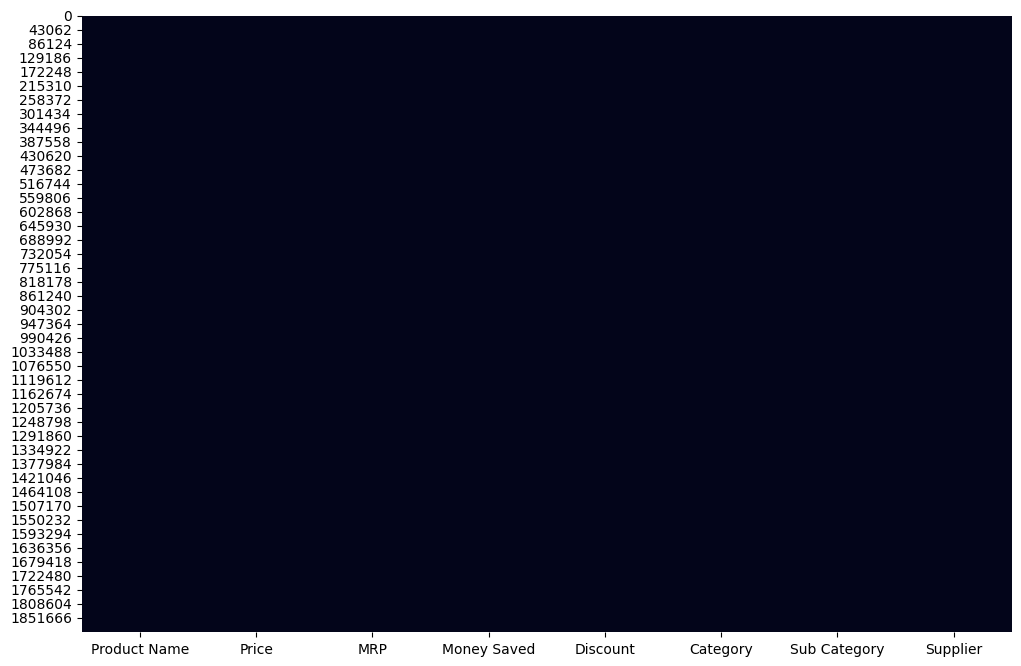

In [225]:
plt.figure(figsize=(12,8))

sns.heatmap(item_data_frame.isnull(),cbar=False)

In [230]:
df_1 = item_data_frame.iloc[:947348,:]
df_2 = item_data_frame.iloc[947348:,:]

In [232]:
df_1.to_excel('Jio Datamart 1.xlsx')

In [233]:
df_2.to_excel('Jio Datamart 2.xlsx')